## Regression 

This notebook shows the implementation of linear regression model and deriving mean absolute error for the data set **Advertising** taken from http://www-bcf.usc.edu/~gareth/ISL/data.html

Libraries used are

- pandas: for data analysis and handling
- numpy: for numerical computation
- matplotlib: for plotting data
- sklearn: for regression, classification models


#### Data Description

There are 3 features *TV*, *Newspaper*, *Radio* and one response variable *Sales* having 200 data points. 

Model is:
$y=\beta_0 +\beta_1 x_1 +\beta_2 x_2 + \beta_3 x_3 $


In [38]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('Advertising.csv',index_col=0)
data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [3]:
data.shape

(200, 4)

In [4]:
feature_col=['TV','Radio','Newspaper']
X=data[feature_col]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [5]:
X.shape

(200, 3)

In [6]:
y=data['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [7]:
y.shape

(200,)

In [8]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [9]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(150, 3)
(50, 3)
(150,)
(50,)


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print linreg.intercept_
print linreg.coef_

2.35755714255
[ 0.04762376  0.19661986 -0.00125801]


In [13]:
zip(feature_col,linreg.coef_)

[('TV', 0.047623756479006442),
 ('Radio', 0.19661986181922564),
 ('Newspaper', -0.0012580079460962513)]

In [14]:
y_pred=linreg.predict(X_test)

In [15]:
from sklearn import metrics
MAD= metrics.mean_absolute_error(y_test,y_pred)
print MAD

1.38958862684


In [16]:
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


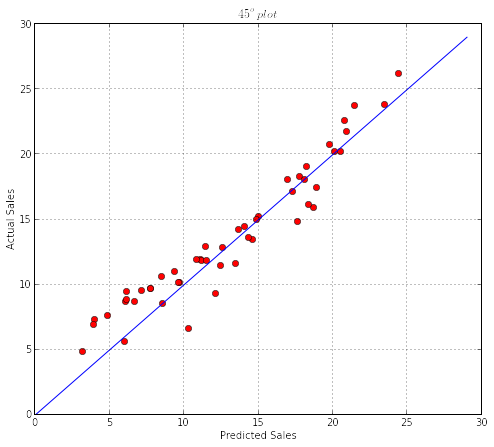

In [37]:
fig1=plt.figure(figsize=(8,7))
axes1=fig1.add_subplot(111)
a=np.arange(30)
axes1.plot(y_pred,y_test, color='red',linestyle='',marker='o')
axes1.plot(a,a, color='b',linestyle='-')
axes1.set_xlabel('Predicted Sales')
axes1.set_ylabel('Actual Sales')
axes1.set_title("$45^o plot$")
axes1.grid()
plt.show()

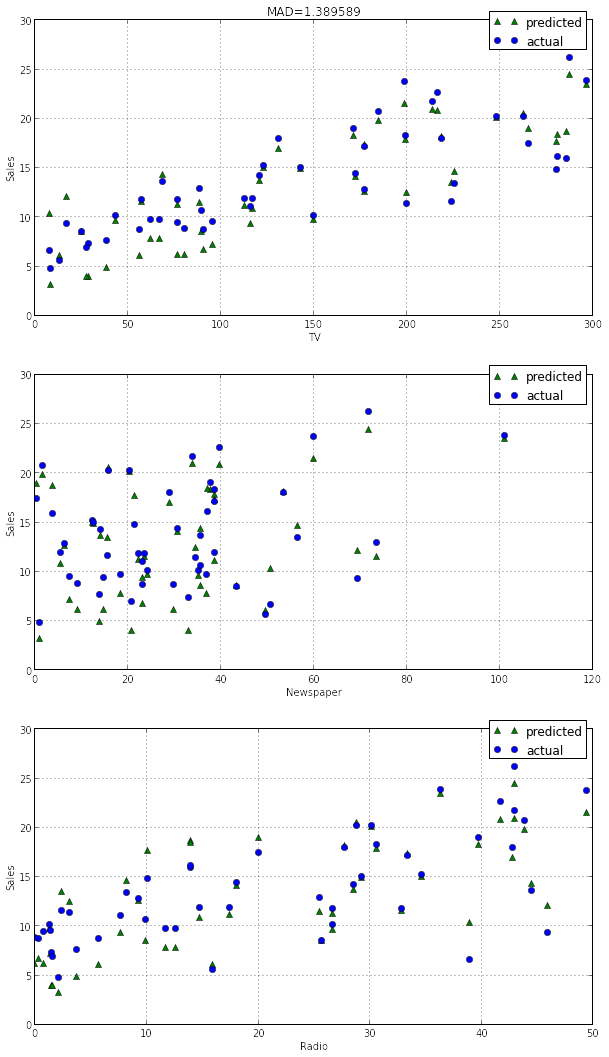

In [23]:
fig2=plt.figure(figsize=(10,18))
axes=fig2.add_subplot(311)
axes.plot(X_test['TV'],y_pred,'g^',label='predicted')
axes.plot(X_test['TV'],y_test,'bo',label='actual')
axes.set_xlabel('TV')
axes.set_ylabel('Sales')
axes.set_title("MAD=%f" %(MAD))
axes.legend(loc='upper right', bbox_to_anchor=(1, 1.05))
axes.grid()

axes=fig2.add_subplot(312)
axes.plot(X_test['Newspaper'],y_pred,'g^',label='predicted')
axes.plot(X_test['Newspaper'],y_test,'bo',label='actual')
axes.set_xlabel('Newspaper')
axes.set_ylabel('Sales')
axes.legend(loc='upper right', bbox_to_anchor=(1, 1.05))
axes.grid()

axes=fig2.add_subplot(313)
axes.plot(X_test['Radio'],y_pred,'g^',label='predicted')
axes.plot(X_test['Radio'],y_test,'bo',label='actual')
axes.set_xlabel('Radio')
axes.set_ylabel('Sales')
axes.legend(loc='upper right', bbox_to_anchor=(1, 1.05))
axes.grid()
plt.show()